In [32]:
!pip install darts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
import statsmodels.api as sm
from darts.models import FFT
from darts import TimeSeries
import pandas as pd
import numpy as np
import datetime
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.preprocessing import MinMaxScaler

In [34]:
df = pd.read_csv('final_daily.csv')
df['date']=pd.to_datetime(df['date'])
df=df[df['date']<datetime.datetime(2023,1,1)]

In [35]:
df1=df[['date','price']]
df2=df[['date','demand']]
df3=df[['date','avg_temp']]

In [36]:
price_train=df1[df1['date']<datetime.datetime(2022,1,1)]
price_test=df1[df1['date']>=datetime.datetime(2022,1,1)]
demand_train=df2[df2['date']<datetime.datetime(2022,1,1)]
demand_test=df2[df2['date']>=datetime.datetime(2022,1,1)]
weather_train=df3[df3['date']<datetime.datetime(2022,1,1)]
weather_test=df3[df3['date']>=datetime.datetime(2022,1,1)]

In [37]:
price_train2 = price_train.drop(['date'], axis = 1)

In [38]:
fc = pd.DataFrame()

for i in range(-365, 0):
  model = FFT(nr_freqs_to_keep=50)
  # model.fit(TimeSeries.from_dataframe(df[['price', 'date']].iloc[:len(df) + i], time_col='date'))
  model.fit(TimeSeries.from_dataframe(df[['demand', 'date']].iloc[:len(df) + i], time_col='date'))
  forecast = model.predict(1)
  fc = pd.concat([fc, forecast.pd_dataframe()])

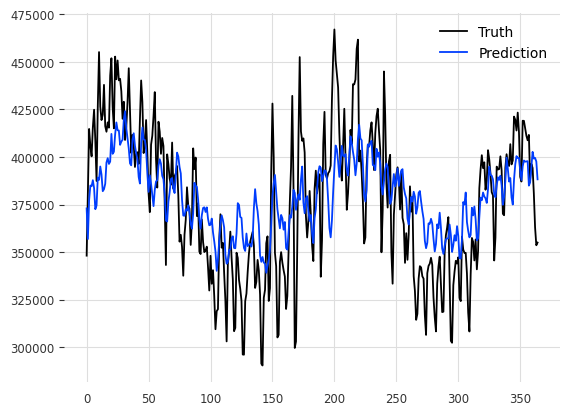

In [39]:
plt.plot(demand_test['demand'].reset_index(drop=True), label='Truth')
# plt.plot(price_test['price'].reset_index(drop=True), label='Truth')
plt.plot(fc.values[:, 0], label='Prediction')
plt.legend()

In [40]:
np.square(fc.values.reshape(-1, 1) - demand_test['demand'].values.reshape(-1, 1)).mean()
# np.square(fc.values.reshape(-1, 1) - price_test['price'].values.reshape(-1, 1)).mean()

750994118.1746398

In [41]:
np.abs(fc.values.reshape(-1, 1) - demand_test['demand'].values.reshape(-1, 1)).mean()
# np.abs(fc.values.reshape(-1, 1) - price_test['price'].values.reshape(-1, 1)).mean()

22018.41270858649

In [42]:
def mape(x, y):
  error = abs(x-y)/abs(x)
  error[error > 1] = 1
  return np.mean(error)

mape(fc.values.reshape(-1, 1), demand_test['demand'].values.reshape(-1, 1))
# mape(fc.values.reshape(-1, 1), price_test['price'].values.reshape(-1, 1))

0.058390041891431585